In [103]:
from scipy.signal import medfilt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [92]:
train_predictions = np.loadtxt('../data/comma_ai/train-3.txt')
train_predictions = np.concatenate([np.array([train_predictions[0]]), train_predictions])

train_labels = np.loadtxt('../data/comma_ai/train.txt')

# Absolute Error


In [93]:
train = pd.DataFrame({'predictions': train_predictions, 'labels': train_labels, 'abs_error': train_labels - train_predictions})
speed_buckets = np.arange(np.ceil(train.labels.max()))

train = train.groupby(pd.cut(train.predictions, speed_buckets))
error_fit = np.polyfit(speed_buckets[1:], train.abs_error.mean().values, 1)

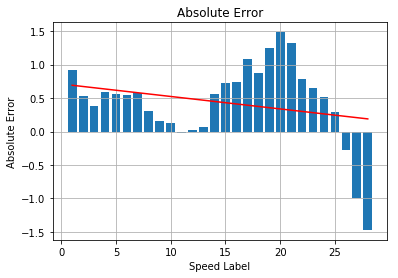

In [94]:
plt.bar(speed_buckets[1:], train.abs_error.mean().values)
plt.plot(speed_buckets[1:], error_fit[0]*speed_buckets[1:] + error_fit[1], color='red')

plt.title('Absolute Error')
plt.xlabel('Speed Label')
plt.ylabel('Absolute Error')

plt.grid()
plt.show()

Our model would probably benifit from a single linear unit with a weight and bias right at the output

# Median Filter

In [95]:
filter_windows = np.arange(3, 250, 4, dtype=np.uint8)
error = np.array([mean_squared_error(train_labels, medfilt(train_predictions, window)) for window in filter_windows])

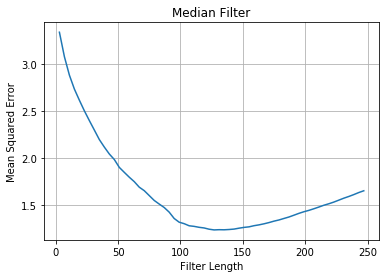

In [96]:
plt.plot(filter_windows, error)

plt.title('Median Filter')
plt.xlabel('Filter Length')
plt.ylabel('Mean Squared Error')

plt.grid()
plt.show()

Our model would benifit from being postprocessed with a median filter at the output

# Signal Post Processing

In [110]:
test = np.loadtxt('../data/comma_ai/test.txt')
test = np.concatenate([np.array([test[0]]), test])

processed_test_predictions = medfilt(test, 121)
np.savetxt('../data/comma_ai/test-postprocessed.txt', processed_test_predictions)

In [78]:
from keras.metrics import 

(10797,)